**IMPORTING** **MY** **PREVIOUS** **MODEL**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import shutil

model_path = '/content/drive/MyDrive/gender_detection_model.keras'

# Loading my model
model = load_model(model_path)

Mounted at /content/drive


In [2]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Example: Replace username/dataset with the Kaggle dataset name
!kaggle datasets download -d yasserhessein/gender-dataset --unzip -p /content/dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/yasserhessein/gender-dataset
License(s): unknown
100% 1.32G/1.32G [00:59<00:00, 25.7MB/s]
100% 1.32G/1.32G [00:59<00:00, 23.7MB/s]


Haar cascade model is primarilay used to detect objects within the images and here we are going to use the same for detecting human face within a picture. The algorith given below will just crop the human face out of an image and put a box around it.

In [3]:
def detect_and_crop_face(image_path, target_size=(150, 150)):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale

    # Detection of faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) > 0:  # If faces are found
        # Cutting the first detected face
        x, y, w, h = faces[0]
        cropped_face = img[y:y+h, x:x+w]

        # Resizing the cropped face to the target size
        cropped_face_resized = cv2.resize(cropped_face, target_size)

        return cropped_face_resized
    else:
        return None

FUNCTION GIVEN WILL BE ABLE TO PREDICT THE GENDER AND SHOW IT IN A HEADER BOX

In [4]:
def detect_and_predict_gender(image_path, model, face_cascade):

    img = cv2.imread(image_path)
    # Again converting to grayscale image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Going through all the faces detected in the image
    for (x, y, w, h) in faces:
        # The below function draws a rectange around the selected face
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Cutting the face and resizing it
        face_img = img[y:y+h, x:x+w]
        face_img_resized = cv2.resize(face_img, (150, 150))
        face_img_resized = face_img_resized / 255.0

        # Predict gender using the model
        face_img_resized = np.expand_dims(face_img_resized, axis=0)  # Add batch dimension
        prediction = model.predict(face_img_resized)

        # Creating a prediction if condition in a form of a sigmoid function of classification
        gender = 'Female' if prediction[0] > 0.5 else 'Male'
        probability = (prediction[0]*100).item() if prediction[0] > 0.5 else ((1 - prediction[0])*100).item() # Probability of the predicted class

        # Changing the font size and thickness for our need
        font_scale = 0.5
        thickness = 2

        # Creating a label with the gender and probability
        label = f" {gender}, {probability:.2f}"
        cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), thickness)

    # Convert the BGR image to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Displaying the image with box,gender and probability label
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


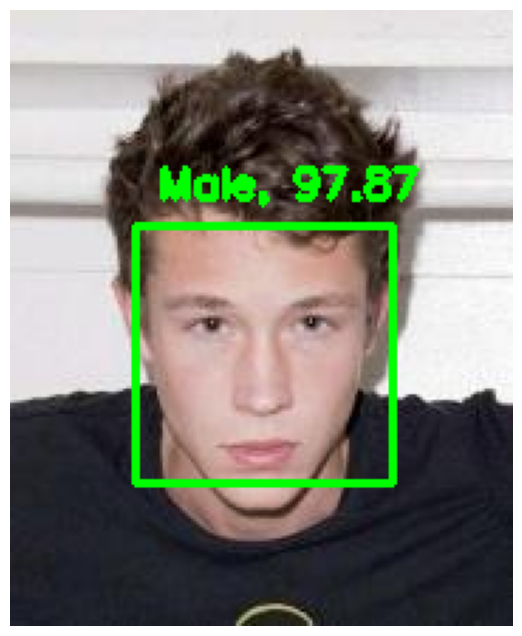

In [5]:
image_path = '/content/dataset/Dataset/Test/Male/160128.jpg'
detect_and_predict_gender(image_path, model, face_cascade)